In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Descriptive Statistics

In [3]:
data.shape

(600, 6)

In [4]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<Axes: >

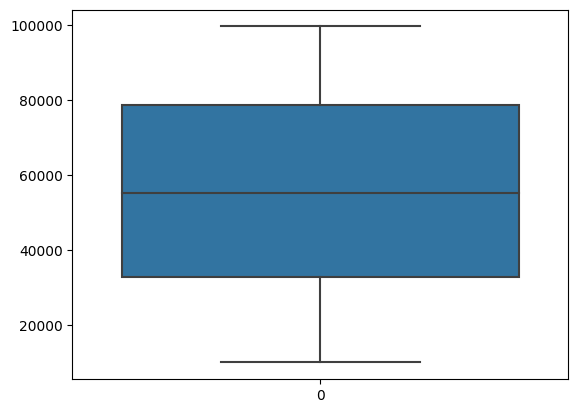

In [14]:
sns.boxplot(data['Taxable.Income'])

Clearly, No outliers are present.

In [7]:
data = pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [8]:
#Creating a new column
data['TaxInc']=pd.cut(data['Taxable.Income'],bins=[10002,30000,99620], labels=['Risky','Good'])

In [9]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [10]:
data= pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)
data.head(30)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


<Axes: >

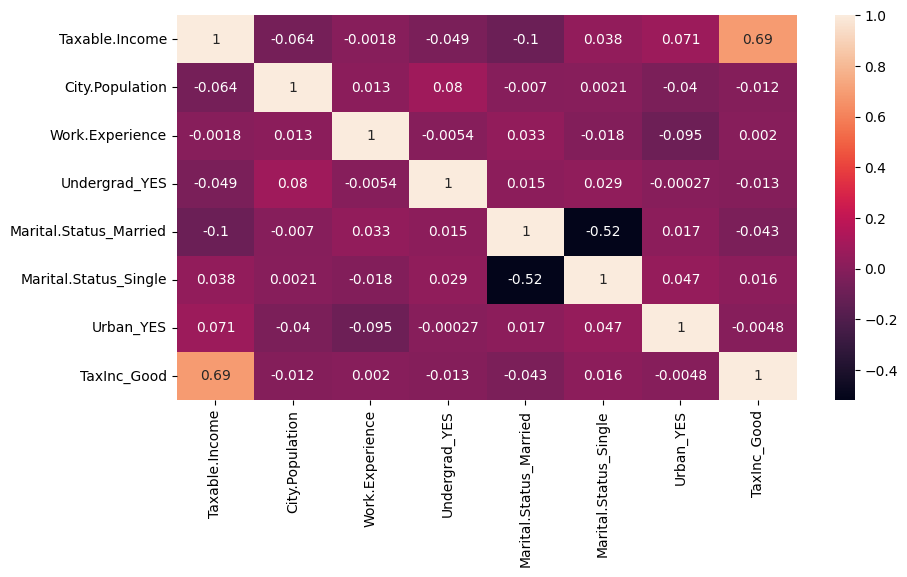

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

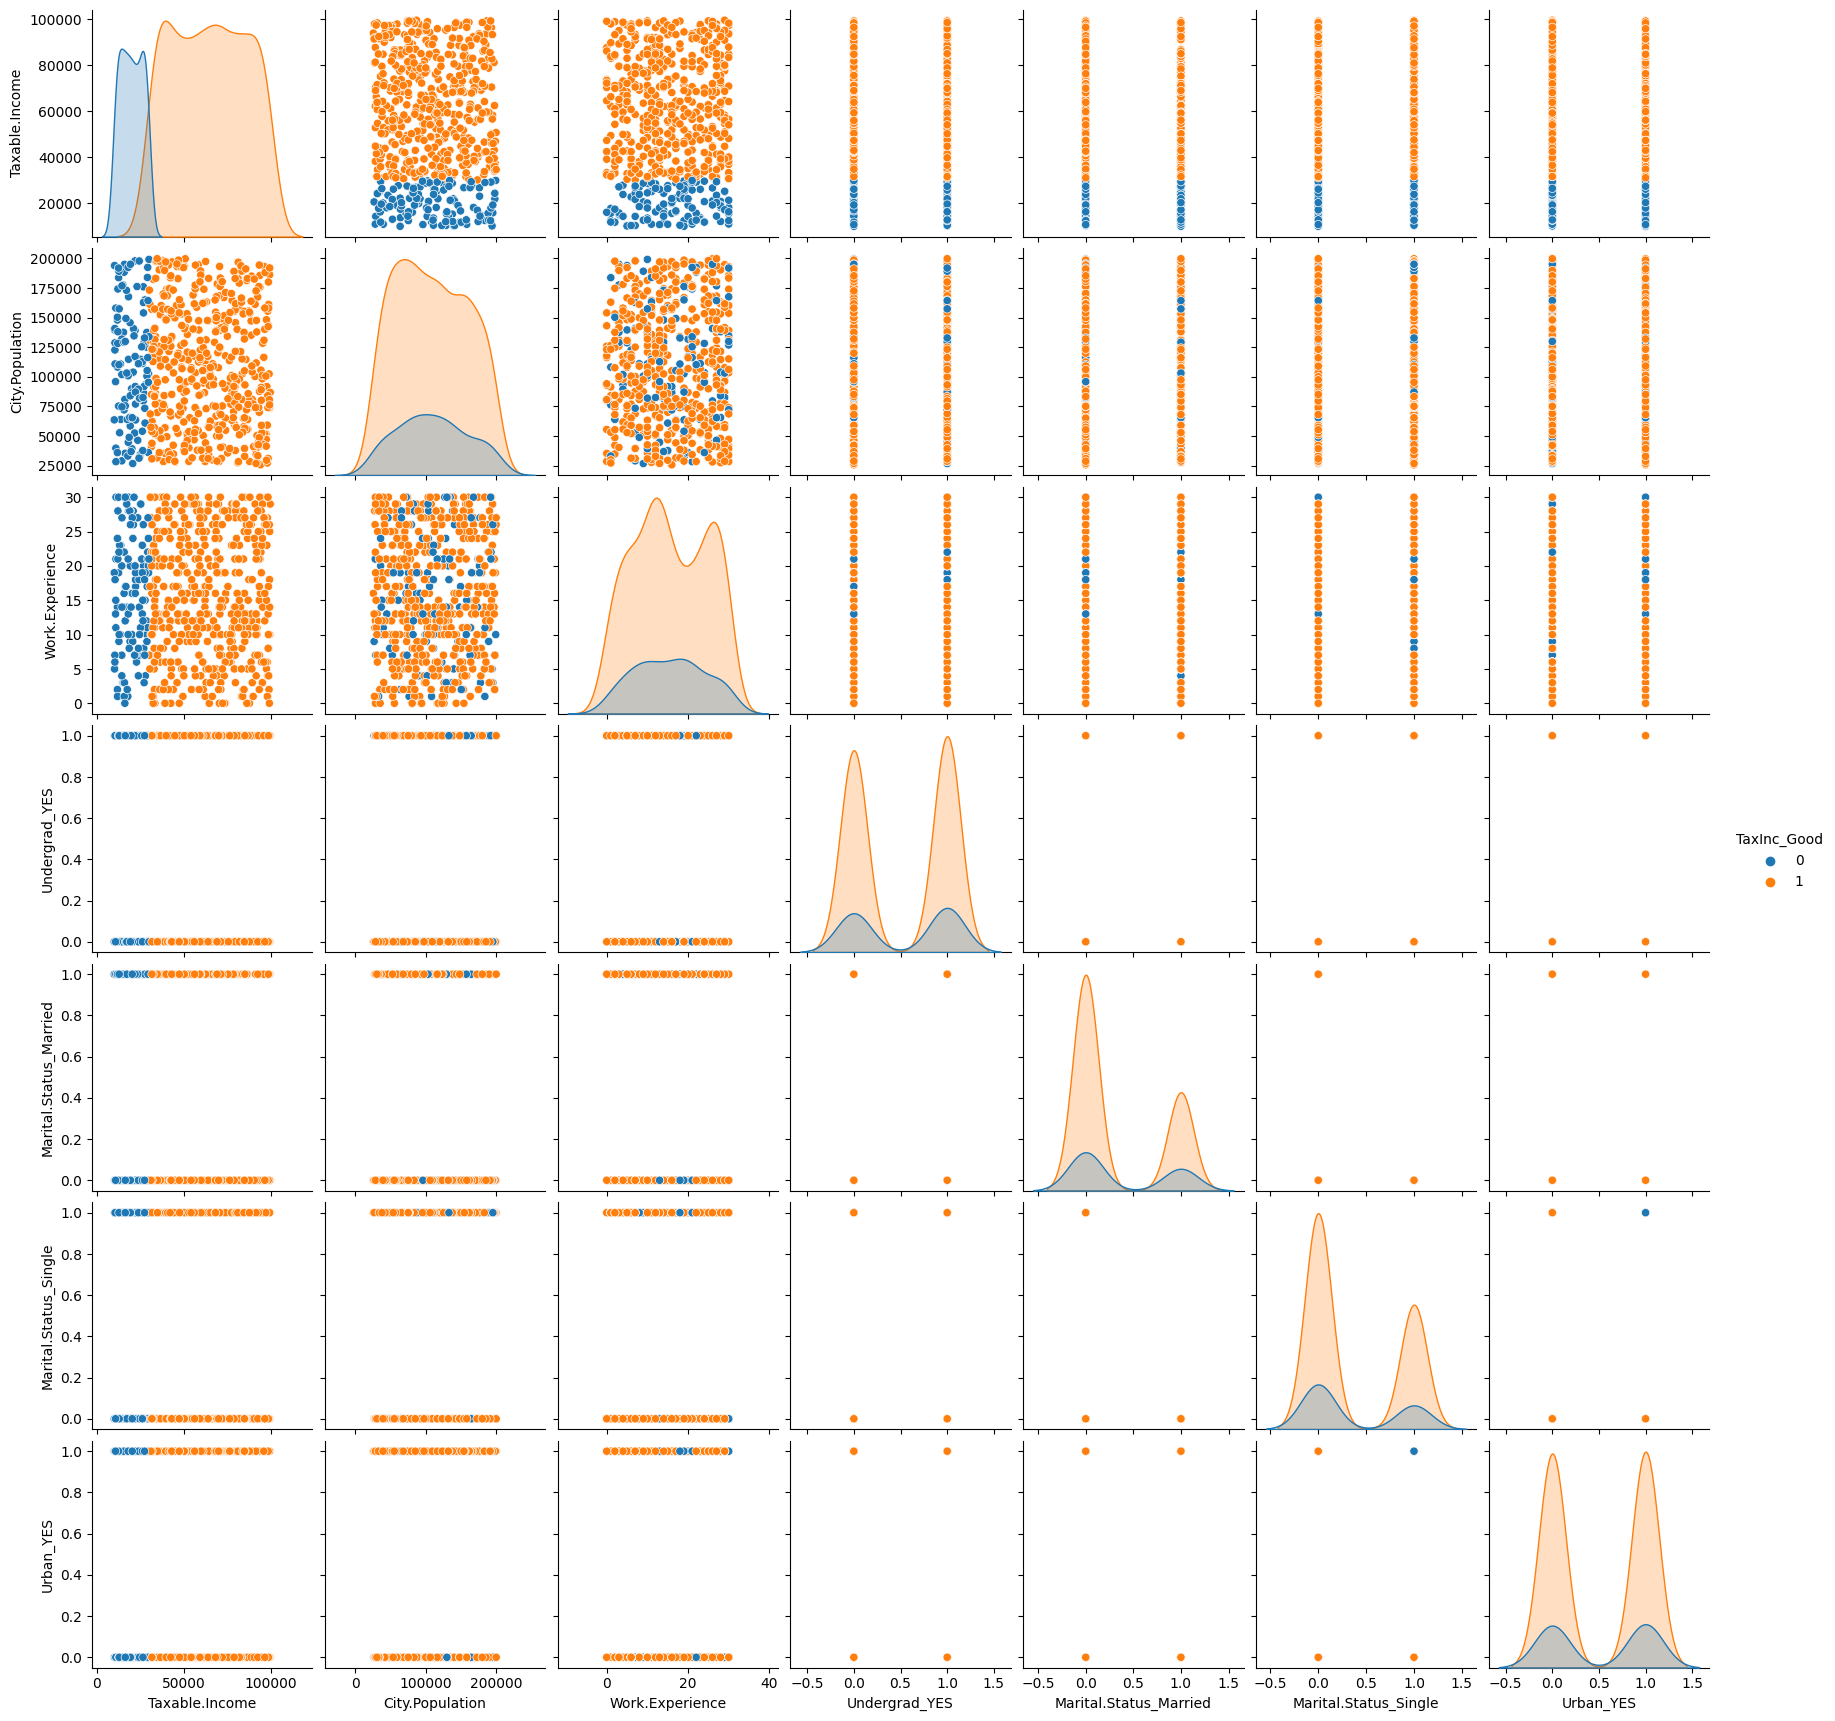

In [12]:
sns.pairplot(data = data, hue = 'TaxInc_Good')

In [15]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [16]:
data_norm = norm_func(data.iloc[:,1:])
data_norm.head(20)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


Now, dividing the entire dataset into x and y

In [17]:
x = data_norm.drop(['TaxInc_Good'], axis=1)
y = data_norm['TaxInc_Good']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
data_norm["income"]="<=30000"
data_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data_norm.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [20]:
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [22]:
data.rename(columns={"Undergrad":"UG","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [25]:
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [26]:
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

Model Building

In [28]:
from sklearn.ensemble import RandomForestClassifier as RF

In [29]:
model = RF(n_jobs=3,n_estimators=15,oob_score=True,criterion='entropy')
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [33]:
model.estimators_
model.classes_
model.n_features_in_
model.n_classes_

2

In [34]:
model.n_outputs_

1

In [36]:
model.oob_score_

0.5125

In [37]:
pred = model.predict(x_train)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,pred)
accuracy

0.9916666666666667

In [42]:
np.mean(pred == y_train)

0.9916666666666667

In [47]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,pred)

In [44]:
pred_test = model.predict(x_test)

In [45]:
acc_test =accuracy_score(y_test,pred_test)

In [48]:
acc_test

0.5833333333333334

USING ENTROPY

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

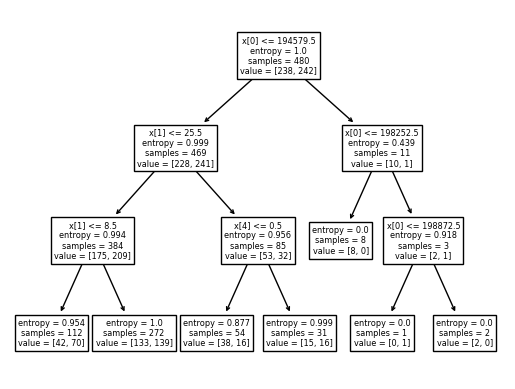

In [50]:
tree.plot_tree(model);

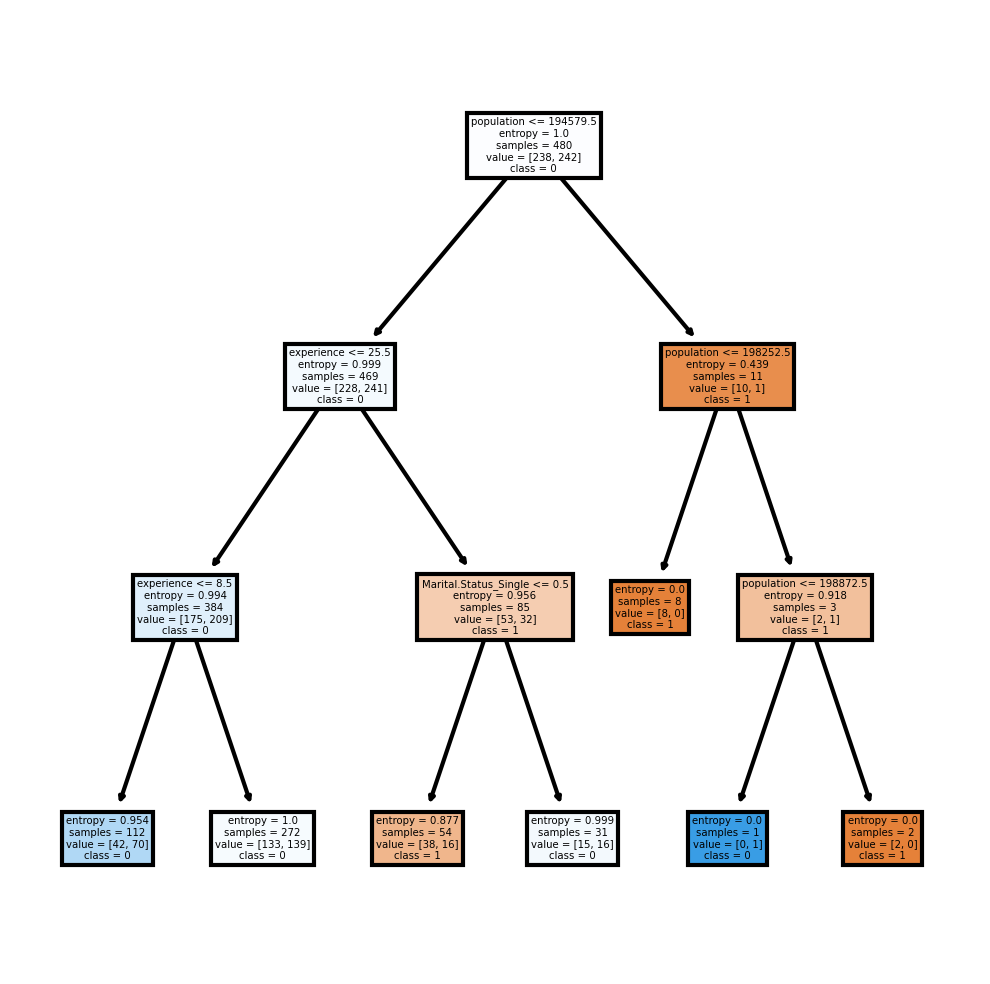

In [51]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [52]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    96
0    24
dtype: int64

In [53]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,10,50
1,14,46


In [54]:
np.mean(preds==y_test)

0.4666666666666667

USING GINI CRITERIA

In [55]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [57]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
pred_y = model_gini.predict(x_test)

In [59]:
np.mean(pred_y==y_test)

0.44166666666666665